In [18]:
import numpy as np
import matplotlib.pyplot as plt
import transforms as T
import importlib        
importlib.reload(T)

<module 'transforms' from '/scratch/ottosson/investigation/plantseg/src/notebooks/transforms.py'>

In [19]:
def random_labeling(label, start_label = 1, min_color = 100):
    label=label.astype(int)
    # label to color
    l2c = np.random.randint(min_color, 255, size = (label.max()+1,))
    for l in range(start_label):
        l2c[l] = l
    label_ = np.zeros_like(label)
    for l in np.unique(label):
        if l < start_label: continue
        label_[label==l] = l2c[l]
    return label_

In [20]:
raw = np.load('/scratch/ottosson/investigation/plantseg/src/notebooks/raw_batch.npy')
label = np.load('/scratch/ottosson/investigation/plantseg/src/notebooks/label_batch.npy')

In [21]:
phase_config = {
  'label': [ {'name': 'Unit'}],
  'raw':[ {'name': 'MotionBlur', 'execution_probability': 1.0}]}

# Get transform
## Get min max ... values
minval = -1
maxval = 2
meanval =0
stdval = 0.2
t = T.get_transformer(phase_config,minval, maxval, meanval, stdval)
raw_transform = t.raw_transform()
label_transform = t.label_transform()

In [30]:
t_raw = raw_transform(raw.copy())
t_label = label_transform(label.copy())
print("Original shapes ", raw.shape, label.shape)
print("Transformed shapes ", t_raw.shape, t_label.shape)

Original shapes  (80, 170, 170) (80, 170, 170)
Transformed shapes  (80, 170, 170) (80, 170, 170)


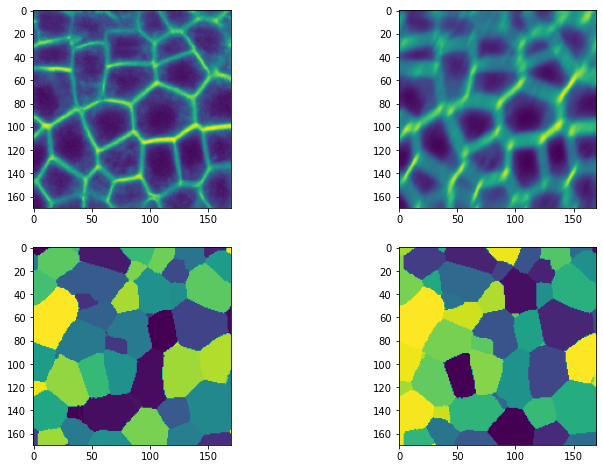

In [31]:
fig, axs = plt.subplots(2,2)
z_slice = 40
axs[0,0].imshow(raw[z_slice])
axs[1,0].imshow(random_labeling(label[z_slice]))
axs[0,1].imshow(t_raw[z_slice])
axs[1,1].imshow(random_labeling(t_label[z_slice]))
fig.set_size_inches(12,8)

In [25]:
raw.shape

(80, 170, 170)

In [30]:
m = raw.copy()
angle = 45
kernel_radius = 3
kernel_diameter = 2*kernel_radius + 1
kernel = np.ones(((1,)*(m.ndim-1))+(kernel_diameter,))/kernel_diameter
m_shape = m.shape
pad_tuple = list((0,0) for _ in range(m.ndim))
pad_tuple[-2] = (kernel_radius, kernel_radius)
pad_tuple[-1] = (kernel_radius, kernel_radius)
m_ = m

In [10]:
from scipy.ndimage import rotate
from scipy.ndimage.filters import convolve


In [15]:
m = raw.copy()
angle = 45
kernel_radius = 3
# define constants
kernel_diameter = 2*kernel_radius + 1
kernel = np.ones(((1,)*(m.ndim-1))+(kernel_diameter,))/kernel_diameter
m_shape = m.shape
pad_tuple = list((0,0) for _ in range(m.ndim))
pad_tuple[-2] = (kernel_radius, kernel_radius)
pad_tuple[-1] = (kernel_radius, kernel_radius)
m_ = m

In [16]:
# transform
m_ = np.pad(m_, pad_tuple, mode='reflect')
m_ = rotate(m_, angle, axes=(1,2), reshape=True, order=3, mode='constant', cval=0)
m_ = convolve(m_, kernel, mode = 'reflect')
m_ = rotate(m_, -angle, axes=(1,2), reshape=False, order=3, mode='constant', cval=0)
center_slice = center_slice = tuple(slice((d2-d1)//2,(d2-d1)//2+d1) for d1,d2 in zip(m_shape, m_.shape))
m_ =  m_[center_slice]

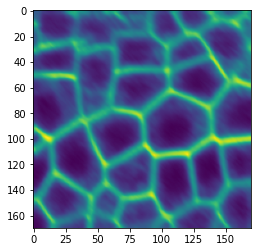

In [17]:
plt.imshow(m_[40])

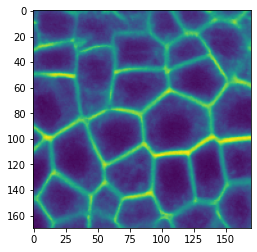

In [63]:
plt.imshow(raw[40])

In [62]:
m_shape

(80, 170, 170)